In [1]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

In [2]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table
from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr

from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)


from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
import time
from time import strftime,strptime
import calendar
from dateutil.parser import parse

#from adjustText import adjust_text
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
from collections import OrderedDict
#from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_1793/3300942447.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
bbox_to_anchor=(0.99, 0.99)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

In [3]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM'

# [specutils](https://specutils.readthedocs.io/en/stable/spectrum1d.html)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

In [5]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D

flux = np.random.randn(200)*u.Jy
wavelength_0 = np.arange(5100, 5300)*u.AA
spec1d = Spectrum1D(spectral_axis=wavelength_0, flux=flux)
ax = plt.subplots()[1]  
ax.plot(spec1d.spectral_axis, spec1d.flux)  
ax.set_xlabel("Dispersion")  
ax.set_ylabel("Flux")  

## FermiAGN_onespec

In [6]:
from specutils import Spectrum1D
#spec1d = Spectrum1D.read("/path/to/file.fits")  
spec1d = Spectrum1D.read("/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081229.fits")  

spec1d.flux,spec1d.spectral_axis,len(spec1d.spectral_axis)

spec1d.shift_spectrum_to(redshift=0.361)  # Equivalent: spec1d.redshift = 0.361
spec1d.spectral_axis

(4700.0, 5120.0)

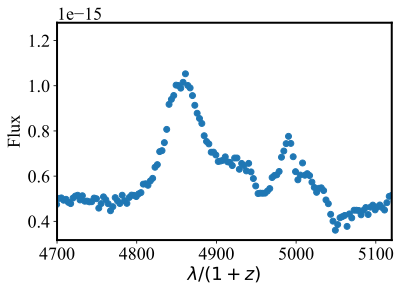

In [8]:
z = 0.361
ax = plt.subplots()[1]  
ax.scatter(spec1d.spectral_axis/(1+z), spec1d.flux)  
ax.set_xlabel("$\lambda/(1+z)$")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)

# Fermi AGN_specs

In [ ]:
!open /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510

## pks1510

In [9]:
from glob import glob
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits

# glob searches through directories similar to the Unix shell
filelist = glob('/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/*/*.fc.spec*.fits')
# sort alphabetically - given the way the filenames are
# this also sorts in time
filelist.sort()

In [10]:
len(filelist)

376

In [ ]:
filelist

In [11]:
sp = fits.open(filelist[0])
sp.info()

header = sp[0].header

wcs = WCS(header)
#make index array
index = np.arange(header['NAXIS1'])

wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
print(wavelength.shape)
#wavelength

#Ahh, this has the wrong dimension. So we flatten it.
wavelength = wavelength.flatten()

print(len(wavelength))

flux_pks1510_0 = sp[0].data

Filename: /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks1510/pks1510/pks1510.fc.spec_081229.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (889,)   float32   
(889, 1)
889


In [ ]:
wavelength

(4700.0, 5120.0)

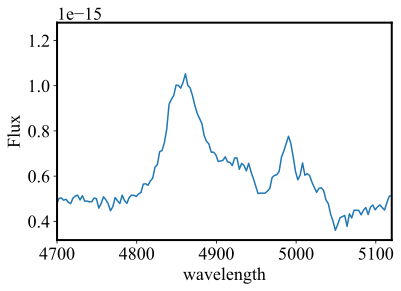

In [13]:
z = 0.361
ax = plt.subplots()[1]  
ax.plot(wavelength/(1+z), flux_pks1510_0)  
ax.set_xlabel("wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)

In [14]:
def read_spec(filename):
    '''Read a UVES spectrum from the ESO pipeline

    Parameters
    ----------
    filename : string
       name of the fits file with the data

    Returns
    -------
    wavelength : np.ndarray
        wavelength (in Ang)
    flux : np.ndarray
        flux (in erg/s/cm**2)
    date_obs : string
        time of observation
    '''
    sp = fits.open(filename)
    header = sp[0].header

    wcs = WCS(header)
    #make index array
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data

    date_obs = header['Date-OBS']
    return wavelength, flux, date_obs

In [18]:
def plot_spec(filename,z = 0.361):
    wavelength, flux, date_obs=read_spec(filename)
    figure_n= 1
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(wavelength/(1+z), flux)  
    ax.set_xlabel("wavelength/(1+%.2f)"%z)  
    ax.set_ylabel("Flux")  
    ax.set_xlim(4700,5120)
    ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    return fig,ax

In [ ]:
wavelength, flux, date_obs=read_spec(filelist[0])

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:title={'center':'pks1510.fc.spec_081229.fits'}, xlabel='wavelength/(1+0.36)', ylabel='Flux'>)

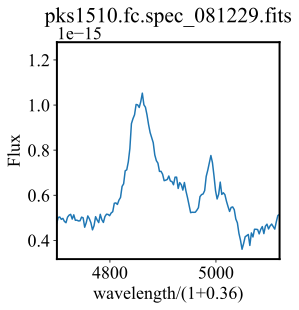

In [19]:
plot_spec(filelist[0],z = 0.361)

plot_spec(filelist[1])

In [ ]:
w, f, date_obs = read_spec(filelist[0])
print(w[0],w[1],w[-1],len(w))

In [25]:
for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    print(w[0],w[1],w[1]-w[0],w[-1],len(w))

4000.0 4004.0 4.0 7552.0 889
4000.5 4004.5 4.0 7548.5 888
4000.10009765625 4004.10009765625 4.0 7548.10009765625 888
3998.5 4002.5 4.0 7550.5 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.0 4004.0 4.0 7552.0 889
4000.9499511718773 4004.9499516487144 4.000000476837158 7548.950374126438 888
3999.85009765625 4003.85009765625 4.0 7551.85009765625 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
3998.4499511718773 4002.4499516487144 4.000000476

3999.999999999998 4004.0022549629193 4.002254962921143 7550.00015211105 888
4000.0000000000036 4003.997747659687 3.9977476596832275 7549.9999217987115 889
4000.0000000000045 4003.997747659688 3.9977476596832275 7549.999921798713 889
3999.999999999997 4004.002254962918 4.002254962921143 7550.000152111048 888
3999.999999999998 4004.0022549629193 4.002254962921143 7550.000152111049 888
3999.999999999996 4003.997747659679 3.9977476596832275 7549.999921798704 889
4000.0000000000036 4004.002254962925 4.002254962921143 7550.000152111055 888
4000.000000000003 4003.9977476596864 3.9977476596832275 7549.9999217987115 889
4000.0000000000005 4004.0022549629216 4.002254962921143 7550.000152111052 888
4000.000000000002 4003.997747659685 3.9977476596832275 7549.99992179871 889
4000.000000000003 4004.0022549629243 4.002254962921143 7550.0001521110535 888
3999.9999999999964 4004.0022549629175 4.002254962921143 7550.000152111048 888
4000.0000000000005 4004.0022549629216 4.002254962921143 7550.0001521110

3999.3000488281214 4003.300048589703 3.999999761581421 7551.299837112422 889
3998.39990234375 4002.39990234375 4.0 7550.39990234375 889
3999.60009765625 4003.60009765625 4.0 7551.60009765625 889
4001.10009765625 4005.10009765625 4.0 7549.10009765625 888
4000.39990234375 4004.39990234375 4.0 7548.39990234375 888
3998.64990234375 4002.64990234375 4.0 7550.64990234375 889
3998.60009765625 4002.60009765625 4.0 7550.60009765625 889
4001.5 4005.5 4.0 7549.5 888
4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
3999.5 4003.5 4.0 7551.5 889
4001.5 4005.5 4.0 7549.5 888
4001.5 4005.5 4.0 7549.5 888
4000.89990234375 4004.89990234375 4.0 7548.89990234375 888
4001.9499511718745 4005.9499516487117 4.000000476837158 7549.950374126436 888
4001.3000488281227 4005.300048589704 3.999999761581421 7549.299837350842 888
3999.4499511718745 4003.4499516487117 4.000000476837158 7551.450374603273 889
4000.5500488281227 4004.550048589704 3.999999761581421 7548.549837350842 888
4001.75 4005.75 4.0 7549.

In [21]:
len(filelist),len(wavelength)

(376, 889)

## get all spectrum

In [22]:
#len(wavelength)
len_wavelength=888
fluxs = np.zeros((len(filelist), len_wavelength))
# date comes as string with 23 characters (dtype = 'S23')
dates = np.zeros((len(filelist)), dtype = 'S23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    
    fluxs[i,:] = f[:len_wavelength]
    dates[i] = date_obs

wavelength_s

wavelength_restframe

In [ ]:
fluxs.shape

In [ ]:
a = np.array([[1, 2], [3, 4],[5,6]])
np.std(a)

In [ ]:
np.std(a, axis=0,) ,np.std(a, axis=0,ddof=1)  

In [ ]:
np.std(a, axis=1),np.std(a, axis=1,ddof=1)

In [ ]:
a.shape

### mean_spectrum

In [20]:
z_pks1510=0.361

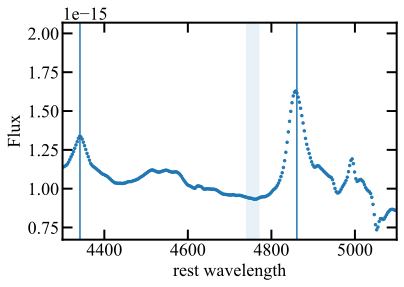

In [46]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 


#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks1510)

ax.errorbar(wavelength_restframe,np.mean(fluxs,axis=0),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.axvspan(4740-1,4771+1,alpha=0.1)

ax.set_xlim(4300,5100)
#ax.axvline(5007)
#ax.axvline(4990)
ax.axvline(4861)
ax.axvline(4341.68)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

### std_spectrum

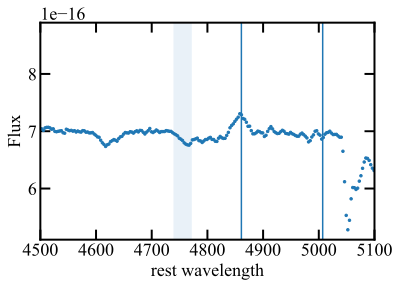

In [37]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 


#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks1510)

ax.errorbar(wavelength_restframe,np.std(fluxs,axis=0,ddof=1),ms=5,ls='',marker='.')

ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  


ax.axvspan(4740-1,4771+1,alpha=0.1)
ax.set_xlim(4500,5100)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

### sigma_line

$$\lambda_{0} = \frac{\int{\lambda f_{\lambda} d\lambda}}{\int{f} d \lambda}$$

$$ \sigma^2_{line}= \frac{\int{\lambda^2 f_{\lambda} d\lambda}}{\int{f} d \lambda} - \lambda_{0}^2 $$

In [30]:
mean_spec=np.mean(fluxs,axis=0)
rms_spec= np.std(fluxs,axis=0,ddof=1)

In [31]:
from astropy import units as u
import numpy as np
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import extract_region

mean_Spec_q = mean_spec*(u.erg * u.cm**-2 * u.s**-1*u.AA**-1)
rms_Spec_q = rms_spec* (u.erg * u.cm**-2 * u.s**-1*u.AA**-1)

spec_region= SpectralRegion(4800*u.AA, 4930*u.AA)

mean_Spec_rest = Spectrum1D(spectral_axis=wavelength[:888]*u.AA/(1+z_pks1510), flux=mean_Spec_q, )
rms_Spec_rest = Spectrum1D(spectral_axis=wavelength[:888]*u.AA/(1+z_pks1510), flux=rms_Spec_q, )

sub_mean_Spec_rest = extract_region(mean_Spec_rest, spec_region)
sub_rms_Spec_rest = extract_region(rms_Spec_rest, spec_region)

In [32]:
delta_wavelength=4/(1+z_pks1510)

lambda_0=  np.sum(sub_mean_Spec_rest.spectral_axis*sub_mean_Spec_rest.flux*delta_wavelength)/np.sum(sub_mean_Spec_rest.flux*delta_wavelength)
sigma2_line= np.sum(sub_mean_Spec_rest.spectral_axis**2*sub_mean_Spec_rest.flux*delta_wavelength)/np.sum(sub_mean_Spec_rest.flux*delta_wavelength)- lambda_0**2
print(lambda_0,sigma2_line, sigma2_line**0.5)

print(sigma2_line**0.5*3.0e5 /(4861*u.AA),'km/s')

4865.909319446675 Angstrom 1228.959424752742 Angstrom2 35.05651757880041 Angstrom
2163.537394289266 km/s


In [33]:
spec_region_continuum= SpectralRegion(4740*u.AA, 4770*u.AA)
sub_mean_Spec_rest_continuum = extract_region(mean_Spec_rest, spec_region_continuum)
sub_rms_Spec_rest_continuum = extract_region(rms_Spec_rest, spec_region_continuum)

In [34]:
sub_mean_Spec_rest_continuum_subtract=Spectrum1D(spectral_axis=sub_mean_Spec_rest.spectral_axis,flux=sub_mean_Spec_rest.flux-np.mean(sub_mean_Spec_rest_continuum.flux))
sub_rms_Spec_rest_continuum_subtract=Spectrum1D(spectral_axis=sub_rms_Spec_rest.spectral_axis,flux=sub_rms_Spec_rest.flux-np.mean(sub_rms_Spec_rest_continuum.flux))


In [ ]:
f, ax = plt.subplots()  
#ax.step(sub_mean_Spec_rest.spectral_axis, sub_mean_Spec_rest.flux) 
#ax.scatter(sub_mean_Spec_rest_continuum.spectral_axis, sub_mean_Spec_rest_continuum.flux) 
ax.scatter(sub_mean_Spec_rest_continuum_subtract.spectral_axis, sub_mean_Spec_rest_continuum_subtract.flux) 

#ax.set_ylim(9e-16,1e-15)
#ax.axhline(max(sub_mean_Spec_rest.flux).value)
#ax.axhline(0.5*max(sub_mean_Spec_rest.flux).value)

In [ ]:
f, ax = plt.subplots()  
#ax.step(sub_mean_Spec_rest.spectral_axis, sub_mean_Spec_rest.flux) 
#ax.scatter(sub_mean_Spec_rest_continuum.spectral_axis, sub_mean_Spec_rest_continuum.flux) 
ax.scatter(sub_rms_Spec_rest_continuum_subtract.spectral_axis, sub_rms_Spec_rest_continuum_subtract.flux) 


In [ ]:
np.mean(sub_mean_Spec_rest_continuum.flux)

In [ ]:
f, ax = plt.subplots()  
#ax.step(sub_mean_Spec_rest.spectral_axis, sub_mean_Spec_rest.flux) 
ax.scatter(sub_mean_Spec_rest_continuum_subtract.spectral_axis, sub_mean_Spec_rest_continuum_subtract.flux) 

ax.axhline(max(sub_mean_Spec_rest_continuum_subtract.flux).value)
ax.axhline(0.5*max(sub_mean_Spec_rest_continuum_subtract.flux).value)

ax.axvline(4837.6193975)
ax.axvline(4884.64364438)

In [ ]:
def get_FWHM_spec(spec):
    max_flux= np.max(spec.flux)
    max_flux_index=np.argmax(spec.flux)
    max_flux_lambda=spec.spectral_axis[max_flux_index]
    
    spec_lambda_left=spec.spectral_axis[:max_flux_index]
    spec_lambda_right=spec.spectral_axis[max_flux_index:]
    
    spec_left=spec.flux[:max_flux_index]
    spec_right=spec.flux[max_flux_index:]
    
    index_l=np.argmin(abs(spec_left-max_flux*0.5))  
    lambda_left=spec_lambda_left[index_l]
        
    index_r=np.argmin(abs(spec_right-max_flux*0.5))  
    lambda_right=spec_lambda_right[index_r]
    
    FWHM_spec=lambda_right- lambda_left
    
    return  lambda_left,lambda_right,FWHM_spec
            
     
        

In [ ]:
get_FWHM_spec(sub_mean_Spec_rest_continuum_subtract)

In [ ]:
get_FWHM_spec(sub_rms_Spec_rest_continuum_subtract)

In [ ]:
f, ax = plt.subplots()
#ax.step(sub_rms_Spec_rest.spectral_axis, sub_rms_Spec_rest.flux)
ax.scatter(sub_rms_Spec_rest_continuum_subtract.spectral_axis, sub_rms_Spec_rest_continuum_subtract.flux)

ax.axhline(max(sub_rms_Spec_rest_continuum_subtract.flux).value)
ax.axhline(0.5*max(sub_rms_Spec_rest_continuum_subtract.flux).value)

ax.axvline(4840.55841293)
ax.axvline(4914.03379868)


np.max(sub_mean_Spec_rest.flux)

In [ ]:
np.argmax(sub_mean_Spec_rest.flux)

In [ ]:
sub_mean_Spec_rest.spectral_axis[np.argmax(sub_mean_Spec_rest.flux)]

In [ ]:
f, ax = plt.subplots()  
ax.step(sub_rms_Spec_rest.spectral_axis, sub_rms_Spec_rest.flux) 

In [ ]:
fwhm(sub_mean_Spec_rest_continuum_subtract),fwhm(sub_rms_Spec_rest_continuum_subtract)

In [ ]:
fwzi(sub_mean_Spec_rest),fwzi(sub_rms_Spec_rest)

In [ ]:
gaussian_sigma_width(sub_mean_Spec_rest_continuum_subtract),gaussian_sigma_width(sub_rms_Spec_rest)

In [ ]:
gaussian_fwhm(sub_mean_Spec_rest_continuum_subtract),gaussian_fwhm(sub_rms_Spec_rest)

In [ ]:
FWHM_OBS= 47 * 3.0e5 / 4861
FWHM_inst= 1150
FWHM_correct= (FWHM_OBS**2-FWHM_inst**2)**0.5
print(FWHM_OBS,FWHM_inst,FWHM_correct)


rms_FWHM_OBS= 34 * 3.0e5 / 4861
rms_FWHM_inst= 1150
rms_FWHM_correct= (rms_FWHM_OBS**2-rms_FWHM_inst**2)**0.5
print(rms_FWHM_OBS,rms_FWHM_inst,rms_FWHM_correct)

In [ ]:
sigm2_OBS= 35 * 3.0e5 / 4861
sigm2_inst= 1150
sigm2_correct= (sigm2_OBS**2-sigm2_inst**2)**0.5
print(sigm2_OBS,sigm2_inst,sigm2_correct)

In [ ]:
fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)    
#ax = plt.subplots()[1]  
ax.plot(mean_Spec_rest.spectral_axis, mean_Spec_rest.flux)  
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

In [ ]:
fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)    
#ax = plt.subplots()[1]  
ax.plot(rms_Spec.spectral_axis/(1+z_pks1510), rms_Spec.flux)  
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4700,5120)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

## pks0736

In [ ]:
# glob searches through directories similar to the Unix shell
filelist_pks0736 = glob('/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/pks0736/*/*.fc.spec*.fits')
# sort alphabetically - given the way the filenames are
# this also sorts in time
filelist_pks0736.sort()

In [ ]:
for i, fname in enumerate(filelist_pks0736):
    w, f, date_obs = read_spec(fname)
    print(w[0],w[1],w[1]-w[0],w[-1],len(w))

In [ ]:
#len(wavelength)
len_wavelength=888
fluxs_pks0736 = np.zeros((len(filelist_pks0736), len_wavelength))
# date comes as string with 23 characters (dtype = 'S23')
dates_pks0736 = np.zeros((len(filelist_pks0736)), dtype = 'S23')

for i, fname in enumerate(filelist_pks0736):
    w, f, date_obs = read_spec(fname)
    
    fluxs_pks0736[i,:] = f[:len_wavelength]
    dates_pks0736[i] = date_obs

### mean_spec

In [ ]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z_pks0736 = 0.189
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks0736)

ax.errorbar(wavelength_restframe,np.mean(fluxs_pks0736,axis=0),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

### std_spec

In [ ]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1) 

z_pks0736 = 0.189
#ax = plt.subplots()[1]  
#ax.plot(wavelength/(1+z), flux)  
wavelength_s=wavelength[:len_wavelength]
wavelength_restframe=wavelength_s/(1+z_pks0736)

ax.errorbar(wavelength_restframe,np.std(fluxs_pks0736,axis=0,ddof=1),ms=5,ls='',marker='.')
ax.set_xlabel("rest wavelength")  
ax.set_ylabel("Flux")  
ax.set_xlim(4200-1,5200+1)
ax.axvline(5007)
ax.axvline(4861)
set_ax_tick(ax)
#ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
#return fig,ax

fluxs = np.zeros((len(filelist), len(wavelength)))
#date comes as string with 23 characters (dtype = 'S23')
dates = np.zeros((len(filelist)), dtype = 'S23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    print(len(w),len(f))

### sigma_line

In [ ]:
mean_spec_pks0736=np.mean(fluxs_pks0736,axis=0)
rms_spec_pks0736= np.std(fluxs_pks0736,axis=0,ddof=1)

delta_wavelength=4
lambda_0_pks0736=  np.sum(wavelength[:888]*mean_spec_pks0736*4)/np.sum(mean_spec_pks0736*4)

sigma2_line_pks0736= np.sum(wavelength[:888]**2*mean_spec_pks0736*4)/np.sum(mean_spec_pks0736*4)- lambda_0_pks0736**2

In [ ]:
print(sigma2_line_pks0736)

In [ ]:
print(lambda_0,lambda_0_pks0736)

In [ ]:
mean_Spec_pks0736 = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=mean_spec_pks0736*(u.erg * u.cm**-2 * u.s**-1*u.AA**-1) )
rms_Spec_pks0736 = Spectrum1D(spectral_axis=wavelength[:888]*u.AA, flux=rms_spec_pks0736* (u.erg * u.cm**-2 * u.s**-1*u.AA**-1) )

In [ ]:
4861*(1+0.189)-200,4861*(1+0.189)+200

In [ ]:
fwhm(mean_Spec_pks0736,SpectralRegion(5500*u.AA, 5900*u.AA))

In [ ]:
gaussian_sigma_width(mean_Spec_pks0736), gaussian_fwhm(mean_Spec_pks0736) ,fwhm(mean_Spec_pks0736),fwzi(mean_Spec_pks0736)

In [ ]:
with quantity_support():
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(mean_Spec.spectral_axis/(1+z_pks0736), mean_Spec.flux)  
    #ax.set_xlabel("rest wavelength")  
    #ax.set_ylabel("mean Flux")  
    ax.set_xlim(4000-200,5600+200)
    set_ax_tick(ax)
    #ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    #return fig,ax

In [ ]:
with quantity_support():
    fig = plt.figure(figsize=(4,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)    
    #ax = plt.subplots()[1]  
    ax.plot(rms_Spec.spectral_axis/(1+z_pks0736), rms_Spec.flux)  
    #ax.set_xlabel("rest wavelength")  
    #ax.set_ylabel("rms Flux")  
    ax.set_xlim(4000-200,5600+200)
    set_ax_tick(ax)
    #ax.set_title('%s'%(filename.split('/')[-1]),pad=20)
    #return fig,ax

## StdDevUncertainty


In [ ]:
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

spec = Spectrum1D(spectral_axis=np.arange(5000, 5010)*u.AA, flux=np.random.sample(10)*u.Jy, uncertainty=StdDevUncertainty(np.random.sample(10) * 0.1))


## [astropy-UVES](https://python4astronomers.github.io/astropy-UVES/UVES.html)

## [analysis](https://specutils.readthedocs.io/en/stable/analysis.html)

## noisy_gaussian

In [ ]:
noisy_gaussian

In [ ]:
flux

In [ ]:
import numpy as np
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
np.random.seed(42)


spectral_axis = np.linspace(11., 1., 200) * u.GHz
spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)
flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)
noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux, uncertainty=uncertainty)


import matplotlib.pyplot as plt 
plt.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux) 

In [ ]:
from specutils.analysis import snr
snr(noisy_gaussian)  

In [ ]:
snr(noisy_gaussian, SpectralRegion(6*u.GHz, 4*u.GHz))  

In [ ]:
from specutils.analysis import snr_derived
snr_derived(noisy_gaussian)  



In [ ]:
snr_derived(noisy_gaussian, SpectralRegion(6*u.GHz, 4*u.GHz))  

## Line Flux Estimates

In [ ]:
from specutils.analysis import line_flux
line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

line_flux(noisy_gaussian).to(u.erg * u.cm**-2 * u.s**-1)  

In [ ]:
flux = line_flux(noisy_gaussian)
flux.uncertainty.to(u.erg * u.cm**-2 * u.s**-1) 

In [ ]:
line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

In [ ]:
from specutils.analysis import equivalent_width
noisy_gaussian_with_continuum = noisy_gaussian + 1*u.Jy
equivalent_width(noisy_gaussian_with_continuum)  



In [ ]:
equivalent_width(noisy_gaussian_with_continuum, regions=SpectralRegion(7*u.GHz, 3*u.GHz))  

## centroid

In [ ]:
from specutils.analysis import centroid
centroid(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))  

## Line Widths

(if FWHM is in unit of wavelength, the width in km/sec is given by c . FWHM /l, with c is the speed of the light = 3.105 km/s). Example, suppose that the FWHM is of 2A at 6563A, the equivalent resolved velocity is about 90 km/s.

In [ ]:
from specutils.analysis import gaussian_sigma_width, gaussian_fwhm, fwhm, fwzi

In [ ]:
gaussian_sigma_width(noisy_gaussian) 

In [ ]:
gaussian_fwhm(noisy_gaussian) 

In [ ]:
fwhm(noisy_gaussian) 

In [ ]:
fwzi(noisy_gaussian) 

## Dust extinction


Dust extinction can be applied to Spectrum1D instances via their internal arrays, using the dust_extinction package (http://dust-extinction.readthedocs.io/en/latest)

Below is an example of how to apply extinction.

In [ ]:
astropy.modeling.physical_models.BlackBody

from astropy.modeling.blackbody import blackbody_lambda
#from astropy.modeling.models import BlackBody
from dust_extinction.parameter_averages import F99

wave = np.logspace(np.log10(1000), np.log10(3e4), num=10) * u.AA
flux = blackbody_lambda(wave, 10000 * u.K)
spec = Spectrum1D(spectral_axis=wave, flux=flux)

#define the model
ext = F99(Rv=3.1)

#extinguish (redden) the spectrum
flux_ext = spec.flux * ext.extinguish(spec.spectral_axis, Ebv=0.5)
spec_ext = Spectrum1D(spectral_axis=wave, flux=flux_ext)

In [ ]:
from astropy.modeling.models import BlackBody
from dust_extinction.parameter_averages import F99

wave = np.logspace(np.log10(1000), np.log10(3e4), num=10) * u.AA
bb = BlackBody(10000 * u.K)
flux = bb(wave)


In [ ]:
spec = Spectrum1D(spectral_axis=wave, flux=flux)

# define the model
ext = F99(Rv=3.1)

# extinguish (redden) the spectrum
flux_ext = spec.flux * ext.extinguish(spec.spectral_axis, Ebv=0.5)
spec_ext = Spectrum1D(spectral_axis=wave, flux=flux_ext)

In [ ]:
with quantity_support():
    plt.figure()
    plt.semilogx(wave, flux,ls=':')
    plt.semilogx(wave, flux_ext,c='r',ls=':')
    
    plt.axvline(bb.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    
    plt.show()

In [ ]:


bb_1 = BlackBody(temperature=5778*u.K)
wav_1 = np.arange(1000, 110000) * u.AA
flux_1  = bb_1(wav_1)

with quantity_support():
    plt.figure()
    plt.semilogx(wav_1, flux_1)
    plt.axvline(bb_1.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()

## Template Cross-correlation

In [ ]:
from specutils.analysis import correlation

size = 200
spec_axis = np.linspace(4500., 6500., num=size) * u.AA
f1 = np.random.randn(size)*0.5 * u.Jy
f2 = np.random.randn(size)*0.5 * u.Jy
rest_value = 6000. * u.AA
mean1 = 5035. * u.AA
mean2 = 5015. * u.AA
g1 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean1, stddev=10. * u.AA)
g2 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean2, stddev=10. * u.AA)
flux1 = f1 + g1(spec_axis)
flux2 = f2 + g2(spec_axis)
uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.Jy)
ospec = Spectrum1D(spectral_axis=spec_axis, flux=flux1, uncertainty=uncertainty, velocity_convention='optical', rest_value=rest_value)
tspec = Spectrum1D(spectral_axis=spec_axis, flux=flux2, uncertainty=uncertainty)
corr, lag = correlation.template_correlate(ospec, tspec)

In [ ]:
plt.figure()
plt.scatter(corr, lag)
plt.semilogx()
plt.semilogy()
plt.axvline(bb_1.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
plt.show()

In [ ]:
# 

In [ ]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

x=np.arange(5)
for index,i in enumerate(x):
    ax.scatter(index,i)